In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

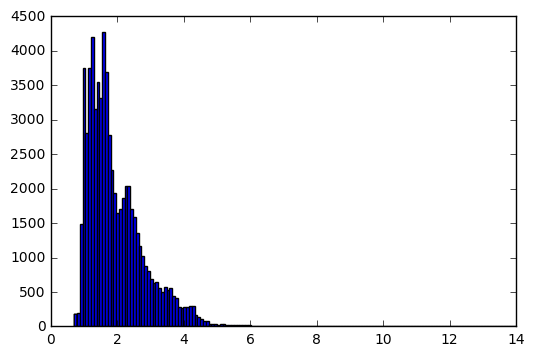

In [2]:
fp = open ("V4t_256_19.0.dat",'r')
rho =[]
for line in fp:
    #print(line.strip().split())
    #print (line)
    #print(line.strip())
    t = line.strip().split()
    for value in t:
        rho.append(float(value))        
binsize = 100    
fp.close()
rho_array = (np.asarray(rho))
plt.hist(rho_array,173)
plt.xlim((0,14))
plt.show()
bincount,bin_edge = np.histogram(rho_array,binsize)

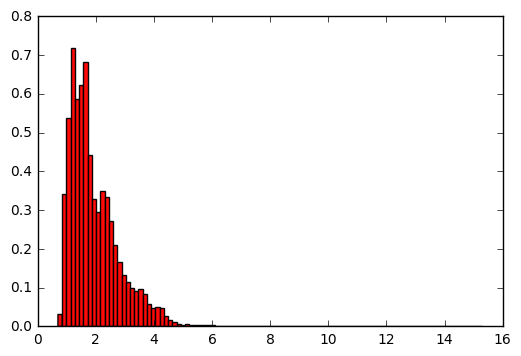

In [3]:
n, bins, patches = plt.hist(rho_array, 100, normed=1, facecolor='red', alpha=10)
plt.show()

In [4]:
scipy.stats.lognormal.fit(rho_array)

NameError: name 'scipy' is not defined

In [5]:
shape, loc, scale = stats.lognorm.fit(rho_array,floc=0)

In [60]:
shape, loc, scale

(0.40986679547183946, 0, 1.7925005178545339)

In [6]:
np.log(scale), shape # mu , sigma

(0.58361158239231292, 0.40986679547183946)

In [8]:
def fitCurve(x,a,b):
    return a*x**b

In [28]:
bincount,bin_edge = np.histogram(rho_array,binsize)
bin_center = (bin_edge[1:]+ bin_edge[:-1])/2.0
# fit data to histogram
xdata=bin_center[16:]
ydata=bincount[16:]
    
fitParams,fitCov=curve_fit(fitCurve,xdata,ydata)
print('a=%f\n'%(fitParams[0]))
print('b=%f\n'%(fitParams[1]))

a=178085.686181

b=-4.346254



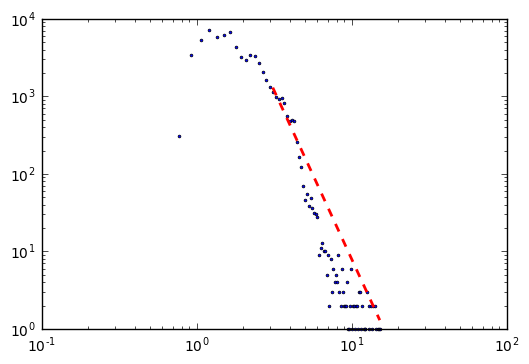

In [29]:
xEval=np.linspace(np.min(xdata),np.max(xdata),1000)
yEval=fitCurve(xEval,fitParams[0],fitParams[1])
#plt.title(Fit)
plt.loglog(bin_center,bincount,'bo',markersize=2,clip_on=False)
plt.loglog(xEval,yEval,'r--',linewidth=2)
plt.show()